<img src="tecno.jpg">


# Analisis de Datos Masivos
## Practica verificación de velocidades de internet


## Nombre del Docente
### Jose Gabriel Rodriguez Rivas

## Nombre del Alumno
### Gerardo Jael Esquivel Martinez

### Parte 1: Determinar si la velocidad de Internet proporcionada cumple con la establecida en el contrato del proveedor

Es probable que, al registrarse a un servicio de Internet, su proveedor se haya comprometido a brindar cierta calidad de servicio. Por ejemplo, es posible que haya recibido una cotización por la velocidad máxima de descarga que se puede alcanzar en su domicilio. La primera parte de esta práctica de laboratorio le permitirá responder la pregunta "¿es mi conexión a Internet más rápida o más lenta de lo prometido?”

In [30]:
import datetime as dt
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

**Paso 1: Importación y limpieza de datos**

El archivo ./Data/rpi_data_compact.csv contiene los datos de velocidad de Internet que necesita para esta práctica de laboratorio. Debe limpiar los datos de velocidad de Internet y guardar el resultado en un nuevo archivo denominado rpi_data_processed.csv.

In [4]:
datos = pd.read_csv("rpi_data_compact.csv")

In [5]:
datos.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


**Elimine la columna de índice adicional**

In [18]:
datos.drop('Unnamed: 0', inplace = True, axis=1)

In [19]:
datos.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


**Detecte y elimine cualquier valor nulo**

In [21]:
datos.isnull()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
668,False,False,False,False,False
669,False,False,False,False,False
670,False,False,False,False,False
671,False,False,False,False,False


In [22]:
datos.isnull().sum().sum()

0

**Convierta los valores de ping y de descarga en flotantes**

In [24]:
datos['Ping (ms)'] = datos['Ping (ms)'].apply(lambda val: float(val))
datos['Download (Mbit/s)'] = datos['Download (Mbit/s)'].apply(lambda val: float(val))

# Save the new cleaned dataframe to a csv called rpi_data_processed.csv. 
# Make sure to use 'index=False' so that you do not introduce an additional column

**Paso 2: Comprensión de la promesa**

Generalmente, su proveedor no prometerá una velocidad de Internet mínima garantizada. Por lo general, deberá especificar sólo la velocidad máxima de Internet que se puede ofrecer en su ubicación. Esto genera la pregunta "¿Es mi conexión a Internet más rápida o más lentamente de lo prometido?” y evaluar la calidad de servicio se convierte en algo un poco complicado.

Las siguientes tareas le permitirán elegir una velocidad de Internet aceptable. Este valor se utilizará entonces para evaluar si su proveedor ofrece un servicio de calidad satisfactoria.

Haga una investigación en línea para probar y descubrir qué velocidad de descarga es razonable esperar en su área. Es probable que también desee una velocidad de Internet necesaria para una tarea dada. Por ejemplo, los sitios web de transmisión de medios en línea requieren una velocidad de descarga de al menos 1.5 Mbit/s. Si considera que su contrato con el proveedor de Internet debe permitirle transmitir videos, este valor podría indicar su expectativa mínima.

Grafique sus datos y decida un valor para la velocidad de descarga, la velocidad de carga y el tiempo de ping mínimos aceptables. La expectativa mínima que desea también se debe tener en cuenta.

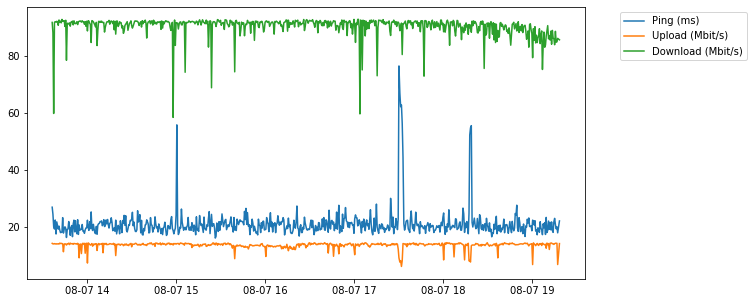

In [36]:
# Plot three curves of different colors
fig, ax = plt.subplots(figsize=(10, 5))
t = pd.to_datetime(datos['Time'])
ax.plot(t, datos['Ping (ms)'], label='Ping (ms)')
ax.plot(t, datos['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, datos['Download (Mbit/s)'], label='Download (Mbit/s)')

# Insert a legend outside of the main plot
ax.legend(bbox_to_anchor=(1.3, 1.))
plt.show()

In [86]:
# Record the values you consider acceptable in these variables
# Examples:
acceptable_upload = 14 #Mbit/s
acceptable_download = 80 #Mbit/s
acceptable_ping = 22 #ms

**Paso 3: Comparación con expectativas**

Tiene un conjunto de datos limpio y ha especificado los valores aceptables. Esto significa que está listo para iniciar la mayor parte del análisis. Una buena estrategia es comenzar con tareas sencillas y avanzar gradualmente a métodos más avanzados.

a) Trace histogramas por velocidad de descarga, velocidad de carga y tiempo de ping. En cada uno de estos gráficos, utilice una línea vertical para indicar el valor que considera aceptable para cada medición.

Text(0.5, 1.0, 'Download (Mbit/s)')

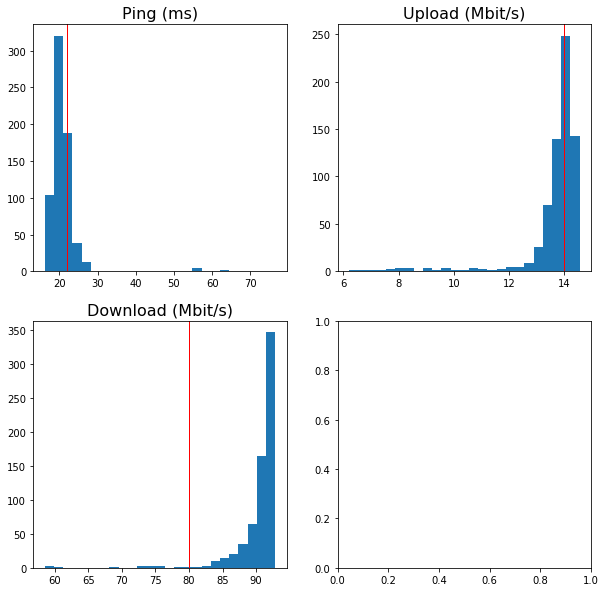

In [87]:
# Initialize figure
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
# plot ping speed
ax[0][0].hist(datos['Ping (ms)'], 25)
# plot acceptable ping 
ax[0][0].axvline(acceptable_ping, color='red', linewidth=1)
ax[0][0].set_title('Ping (ms)', fontsize=16)

# plot upload speed
ax[0][1].hist(datos['Upload (Mbit/s)'], 25)

# plot acceptable upload
ax[0][1].axvline(acceptable_upload, color='red', linewidth=1)
ax[0][1].set_title('Upload (Mbit/s)', fontsize=16)

# plot download speed
ax[1][0].hist(datos['Download (Mbit/s)'], 25)

# plot acceptable download
ax[1][0].axvline(acceptable_download, color='red', linewidth=1)
ax[1][0].set_title('Download (Mbit/s)', fontsize=16)

**b) Calcule el promedio y la desviación estándar de la velocidad de descarga, la velocidad de carga y el tiempo de ping, y calcule cuántas desviaciones estándar separan a los valores aceptables de los valores promedio.**

In [88]:
# compute the means and the standard deviations of the various measures
means = datos.mean()
stands = datos.std()

# this makes the results look better with labels
quote_ping = (means['Ping (ms)'], stands['Ping (ms)'])
quote_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
quote_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# print the results
print('Tiempo medio de ping: {} ± {} ms'.format(*quote_ping))
print('Velocidad de descarga media: {} ± {} ms'.format(*quote_ping))
print('Velocidad de carga media: {} ± {} ms'.format(*quote_ping))
# blank line
print
print('Distancia entre la velocidad de ping aceptable y la media: {:.2f} desviaciones estandar'.format((quote_ping[0]-acceptable_ping)/quote_ping[1]))
print('Distancia entre la velocidad de descarga aceptable y la media: {:.2f} desviaciones estandar'.format((quote_ping[0]-acceptable_download)/quote_ping[1]))
print('Distancia entre la velocidad de carga aceptable y la media: {:.2f} desviaciones estandar'.format((quote_ping[0]-acceptable_upload)/quote_ping[1]))

Tiempo medio de ping: 21.115451708766724 ± 5.161225495663228 ms
Velocidad de descarga media: 21.115451708766724 ± 5.161225495663228 ms
Velocidad de carga media: 21.115451708766724 ± 5.161225495663228 ms
Distancia entre la velocidad de ping aceptable y la media: -0.17 desviaciones estandar
Distancia entre la velocidad de descarga aceptable y la media: -11.41 desviaciones estandar
Distancia entre la velocidad de carga aceptable y la media: 1.38 desviaciones estandar


**C) Calcule el porcentaje de mediciones de velocidad de descarga que no son aceptables. Repita este cálculo para la velocidad de carga y ping.**

In [90]:
print('{:.2f}% de las mediciones son inferiores a la velocidad de descarga aceptable.'.format(np.sum(datos['Download (Mbit/s)']<acceptable_download)/float(len(datos))*100))

print('{:.2f}% de las mediciones son inferiores a la velocidad de carga aceptable.'.format(np.sum(datos['Upload (Mbit/s)']<acceptable_upload)/float(len(datos))*100))

print('{:.2f}% de las mediciones son inferiores al ping aceptable.'.format(np.sum(datos['Ping (ms)']<acceptable_ping)/float(len(datos))*100))

1.93% de las mediciones son inferiores a la velocidad de descarga aceptable.
51.26% de las mediciones son inferiores a la velocidad de carga aceptable.
78.16% de las mediciones son inferiores al ping aceptable.


**d) Busque el porcentaje de mediciones que no satisface sus criterios de servicio aceptable en las tres cantidades.**

In [92]:
all_three = np.sum((datos['Ping (ms)']<acceptable_ping) & (datos['Download (Mbit/s)']<acceptable_download) & (datos['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% de las mediciones no son aceptables en los tres casos.'.format(all_three/float(len(datos))*100))

1.04% de las mediciones no son aceptables en los tres casos.


**e) Busque el porcentaje de mediciones que no satisface sus criterios de servicio aceptable en dos de las tres cantidades.**

In [93]:
ping_upload = np.sum((datos['Ping (ms)']<acceptable_ping) & (datos['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% de las mediciones no son aceptables para ping y carga.'.format(ping_upload/float(len(datos))*100))

ping_download = np.sum((datos['Ping (ms)']<acceptable_ping) & (datos['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% de las mediciones no son aceptables para ping y descarga.'.format(ping_download/float(len(datos))*100))

upload_download = np.sum((datos['Upload (Mbit/s)']<acceptable_upload) & (datos['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% de las mediciones no son aceptables para carga y descarga.'.format(upload_download/float(len(datos))*100))

37.74% de las mediciones no son aceptables para ping y carga.
1.63% de las mediciones no son aceptables para ping y descarga.
1.19% de las mediciones no son aceptables para carga y descarga.
